<a href="https://colab.research.google.com/github/Tanya2206/python/blob/main/Final_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: To predict a rider's taxi fare.

Analytic approach: Regression

Since we have to predict the Taxi's Fare on the basis of the other attributes.

So, We need to understand and build the relations between the fare amount and other attributes.

---

To predict the Taxi Fare we should know on which parameters the fare amount can depend upon:

1. The distance covered.
2. Time of pick up, it might have Extra charges at nights or in early mornings.
3. It might depend on the days (like on some special days the taxi driver earned more.)
4. With years, how high or low the fare-amount get.
5. It can depend on number of passengers travelling.

In [229]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  # %matplotlib inline is used is to render any matplotlib diagrams even if the plt. show() function is not called.
%matplotlib inline                
import seaborn as sns
from sklearn.model_selection import train_test_split       #To split the data into train and test data
from sklearn.preprocessing import StandardScaler           #For standardization
from sklearn.linear_model import LinearRegression          
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#Above codes import all the necessary libraries required to perform the Regression Algorithms

In [230]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")  #reading the dataset

- Data Understanding and Data Preparation

In [231]:
df.shape

(50000, 8)

Currrently in the dataset we have 50000 rows and 8 columns.

In [232]:
df.dtypes  #Gives the datatype of each column

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [233]:
df.head()   #By defualt gives the first 5 rows of the dataset

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


- Features of this Data:

-pickup_datetime - timestamp value indicating when the taxi ride started.

-pickup_longitude - float for longitude coordinate of where the taxi ride started.

-pickup_latitude - float for latitude coordinate of where the taxi ride started.

-dropoff_longitude - float for longitude coordinate of where the taxi ride ended.

-dropoff_latitude - float for latitude coordinate of where the taxi ride ended.

-passenger_count - integer indicating the number of passengers in the taxi ride.

-amount - float dollar amount of the cost of the taxi ride.

In [234]:
df.describe(include='all')    #gives STATISTICAL DESCRIPTION for ALL the Columns of any data type

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


Inference from the above description of data:

-count: gives the number of observations in the respective column.

-mean: gives the mean of the observation belonging to numerical data type Column

-std: gives standard deviation of the observation belonging to numerical data type Column.

-min: gives the minimum value of observation in the column.

-25% refers to the observations that falls below 1st quartile

-50% refers to the observation falls below 2md quartile

---





From the able table we can understand and make the required changes in the given dataset:

- In the column 'amount', the min amount is NEGATIVE which is in practical not possible, So we have to drop all such amounts which are <=0(less than equal to 0).

- In the column 'no_of_passenger' we have minimum as 0, which is again physically not possible.


In [235]:
df=df[df['amount']>0]
df=df[df['no_of_passenger']> 0]
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


Now, the min amount and min no_of_passenger are posivitve and practically possible.

---



Also, the unique_id column can be dropped as all the ids are unique and do not contribute in the solution of the problem statement.

In [236]:
df.drop(['unique_id'],axis=1,inplace=True)

Using Haversine formula, To can get the distance travelled by the passenger from the given lattitudes and longitudes of pickup and dropoff locations.

In [237]:
#Defning function to compute distance from the formula

def haversine_form(lon1, lat1, lon2, lat2):                  
  from math import pi
  p = pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [238]:
#New column containing Distance is made named as dis_miles

df["dis_miles"]=haversine_form(df["longitude_of_pickup"],df["latitude_of_pickup"],df["longitude_of_dropoff"],df["latitude_of_dropoff"])
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dis_miles
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


so, the longitude and lattitude column can be dropped, as we got the relevant information already in column 'dis_mies' that contains the distance between pickup and drop location in units of miles.

In [239]:
df=df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1)
df.head()

,amount,date_time_of_pickup,no_of_passenger,dis_miles
0,4.5,2009-06-15 17:26:21 UTC,1,0.640487
1,16.9,2010-01-05 16:52:16 UTC,1,5.250670
2,5.7,2011-08-18 00:35:00 UTC,2,0.863411
3,7.7,2012-04-21 04:30:42 UTC,1,1.739386
4,5.3,2010-03-09 07:51:00 UTC,1,1.242218


Now, to get day,month,year and time from the column 'date_time_of_pickup'; first we need to change the UTC format given in dataset to datetime function, and then extract the day,date,time,month and year.

In [240]:
#Converting the format in date_time_of_pickup into datetime uding the functions from pandas 

df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

import datetime

df['year']=df['date_time_of_pickup'].dt.year
df['month'] =df['date_time_of_pickup'].dt.month
df['day'] =df['date_time_of_pickup'].dt.day
df['day_of_week']=df['date_time_of_pickup'].dt.dayofweek
df['hour'] = df['date_time_of_pickup'].dt.hour

df.head()

,amount,date_time_of_pickup,no_of_passenger,dis_miles,year,month,day,day_of_week,hour
0,4.5,2009-06-15 17:26:21+00:00,1,0.640487,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16+00:00,1,5.250670,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00+00:00,2,0.863411,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42+00:00,1,1.739386,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00+00:00,1,1.242218,2010,3,9,1,7


Explaination of the code used above:

df['year']=df['date_time_of_pickup'].dt.year: This line extracts the year component from the datetime column and creates a new column named 'year' in the DataFrame.

df['month'] =df['date_time_of_pickup'].dt.month: Similarly, this line extracts the month component and creates a new column named 'month' in the DataFrame.

df['day'] =df['date_time_of_pickup'].dt.day: This line extracts the day component and creates a new column named 'day' in the DataFrame.

df['hour'] = df['date_time_of_pickup'].dt.hour: This line extracts the hour component and creates a new column named 'hour' in the DataFrame.

---
SO, column date_time_of_pickup can be droped.


In [241]:
df.drop(["date_time_of_pickup"],axis=1,inplace=True)

In [242]:
#Using the information from "pandas.DatetimeIndex.dayofweek" replacing the the numbers with their name of days, and months 

df["day_of_week"]=df['day_of_week'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['month']=df['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df.sample(10)

,amount,no_of_passenger,dis_miles,year,month,day,day_of_week,hour
17570,48.83,1,6.907981,2013,Apr,2,Tue,18
46990,6.10,1,1.171412,2012,Jul,26,Thu,6
46650,7.30,5,1.591578,2010,Feb,12,Fri,17
33927,3.00,1,0.297746,2012,Nov,29,Thu,11
45540,5.50,1,0.849283,2013,May,13,Mon,7
43466,8.50,1,1.176879,2012,Sep,21,Fri,0
42101,2.90,2,0.152456,2012,Jul,13,Fri,22
39974,6.50,1,0.968180,2012,Apr,15,Sun,18
14917,5.70,1,0.484867,2011,Oct,31,Mon,17
40363,4.50,1,0.344874,2014,May,8,Thu,10


- Data visulaisation and Understanding can be performed, as now we have the columns in a form which can be directly plotted and inferred easily.

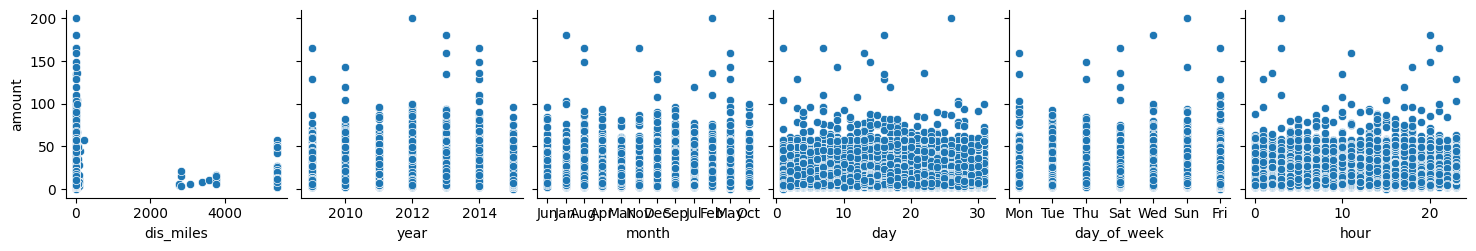

In [243]:
sns.pairplot(df,y_vars=['amount'],x_vars=['dis_miles','year','month','day','day_of_week','hour'],diag_kind='auto')  #gives the Visual relation between all the combination of two attributes

#To get the required relation in Independent and Dependent Variables, the variables for x and y are specifially mentioned to the parameters of pairplot. 

- From amount vs dis_miles; Most of the amount came from passengers who travelled small distances. It means most of the people do not prefer Taxi to travel large distances but instead use for small routes

- In other plots, not much inference can be made bcoz the data is bit scattered, will be analysed by using other visual methods.



---
Anlysing relation of year with fare amount.



1    34800
2     7386
5     3453
3     2183
4     1015
6      989
Name: no_of_passenger, dtype: int64

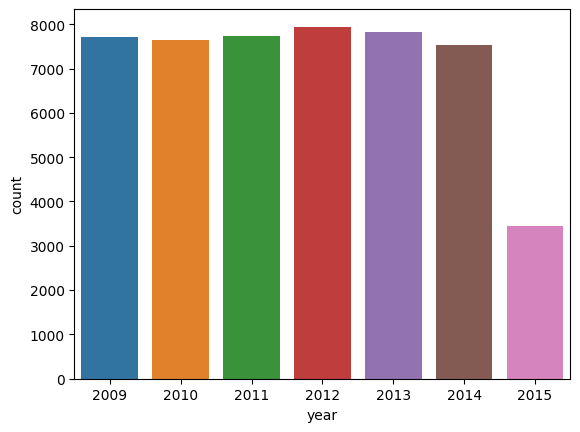

In [244]:
sns.countplot(x='year',data=df)
df['no_of_passenger'].value_counts()

- From year 2012 there is declination, which means People have reduced using Taxi for travelling. And might be beacuse of this, the enteries of fare amount of Taxi for year 2015 is very less compared to other years.

<Axes: xlabel='year', ylabel='amount'>

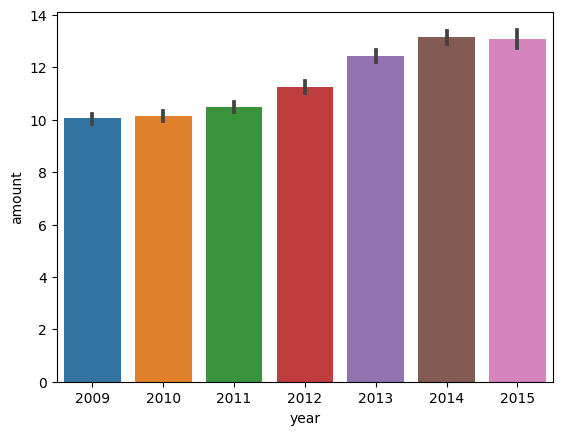

In [245]:
sns.barplot(x = 'year', y = 'amount', data = df)

- In this above plot, with Years the Taxi prices have increased.

- What can relation can be inferred from year and amount plots?

As the Taxi fares got increased with years people also reduced using Taxis as transport. [This is a possible situation that can be inferred.]


---

Anlysing relation of month with fare amount.

<Axes: xlabel='month', ylabel='count'>

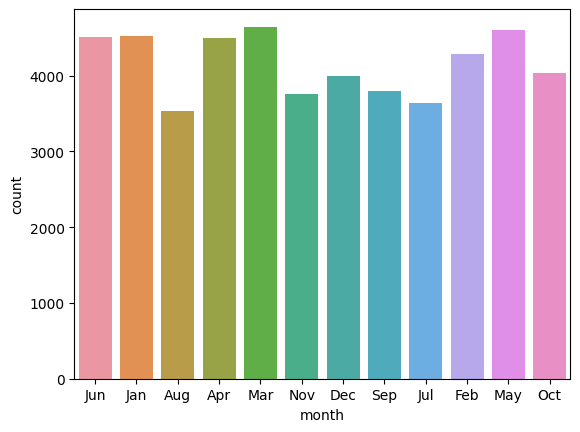

In [246]:
sns.countplot(x='month',data=df)

- Enteries for months Aug, Nov, Sep, Jul are less then it can be infered that people have not used Taxi for transport much in these months.

<Axes: xlabel='month', ylabel='amount'>

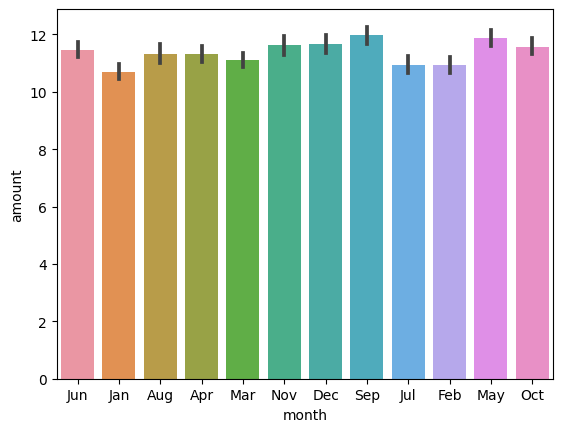

In [247]:
sns.barplot(x = 'month', y = 'amount', data = df)

- The total fare amount has been more in few months like September.

As saw the relation between years and amount the amount got increased with upcoming years and so that could be the reason that total fare amount is high even for the months when people have not travelled from Taxi much. 



---

Anlysing relation of day of week with fare amount.

Fri    7636
Sat    7607
Thu    7380
Wed    7185
Tue    6901
Mon    6620
Sun    6497
Name: day_of_week, dtype: int64

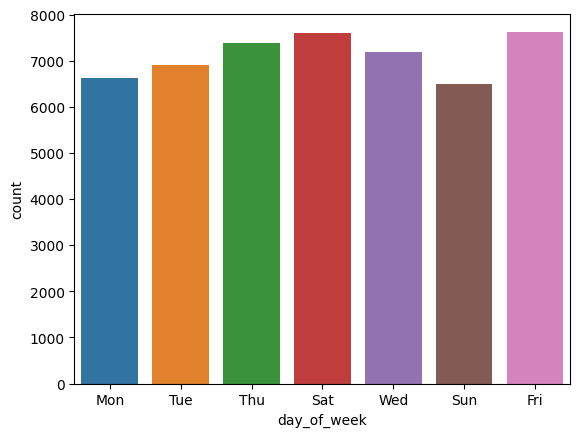

In [248]:
sns.countplot(x='day_of_week',data=df)
df['day_of_week'].value_counts()

- On Sundays, Taxi haven't been used much for transpotation. But on Saturdays and Friday it is opposite. It might be because Sunday it is holiday, so people prefer not to travel much from Taxi.

<Axes: xlabel='day_of_week', ylabel='amount'>

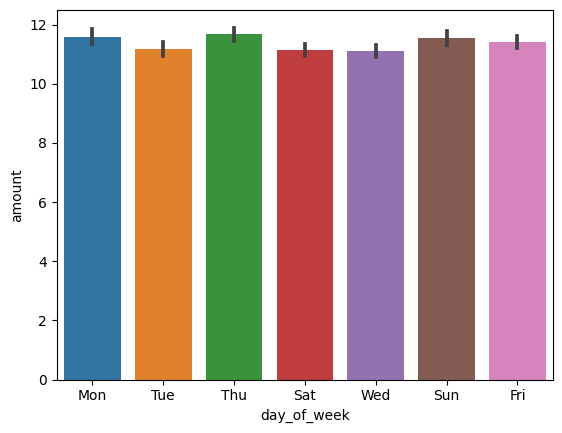

In [249]:
sns.barplot(x = 'day_of_week', y = 'amount', data = df)

- Total fare amount is more in days like Thursday, Monday and Sunday.

Same arguement can be made again here that within years the fare prices have rose.



---

Anlysing relation of hours in a day with fare amount.


Plot of how frequent the people have used taxi for ride for certain hours in a day : Axes(0.125,0.11;0.775x0.77)


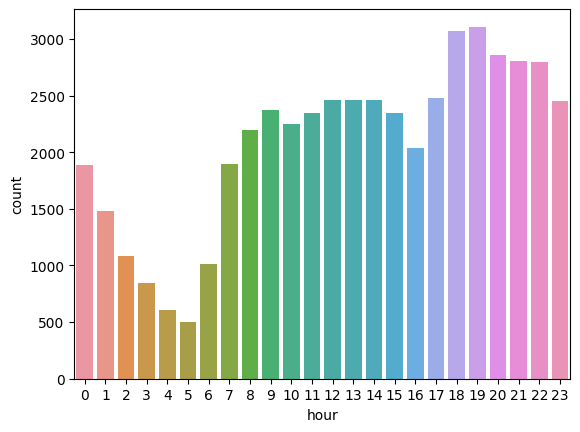

In [250]:
print("Plot of how frequent the people have used taxi for ride for certain hours in a day :",sns.countplot(x='hour',data=df))

Taxi has been mostly used around 5pm-6pm, and very less used 4am-5am.

Amount vs hour : Axes(0.125,0.11;0.775x0.77)


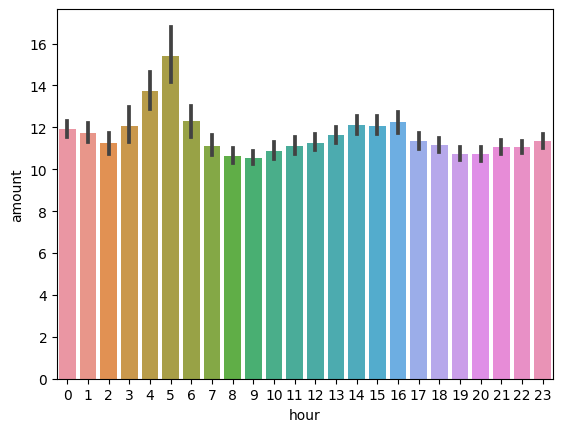

In [251]:
print("Amount vs hour :",sns.barplot(x = 'hour', y = 'amount', data = df))

Fare amount is higher around 4am - 5am, even if people have not used Taxi much in these hours.

So, it can be inferred that Taxis might have early morning Charges.



---



Anlysing relation of distance with fare amount.


<Axes: xlabel='dis_miles', ylabel='count'>

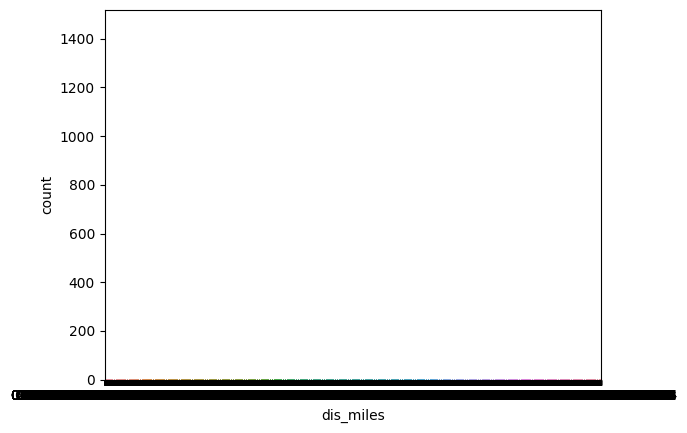

In [252]:
 sns.countplot(x='dis_miles',data=df)

NO good inference can be made.
But as we have already seen above in pairplot that people have mostly used Taxi for travelling small routes.

<Axes: xlabel='dis_miles', ylabel='amount'>

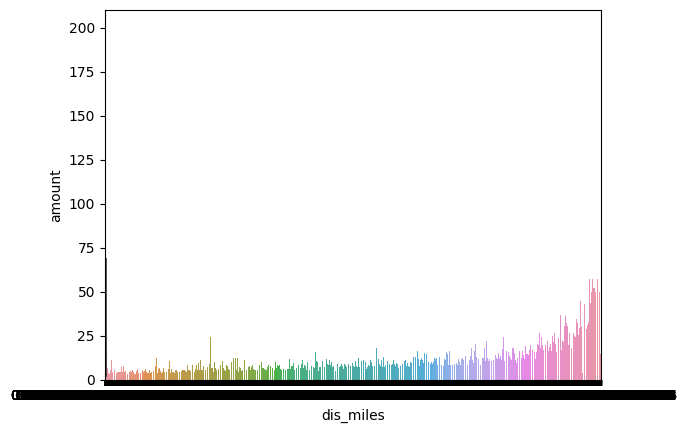

In [253]:
 sns.barplot(x = 'dis_miles', y = 'amount', data = df)

The fare amount increases as the distance of travel increases.



---

Anlysing relation of number of passenge with fare amount

1    34800
2     7386
5     3453
3     2183
4     1015
6      989
Name: no_of_passenger, dtype: int64

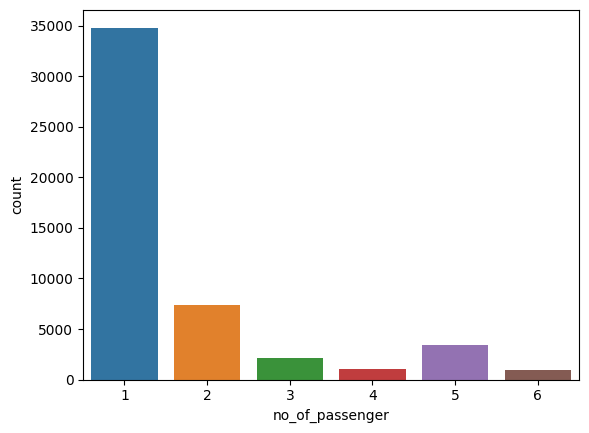

In [254]:
sns.countplot(x='no_of_passenger',data=df)
df['no_of_passenger'].value_counts()

Most of the time, the number of passenger has been one.

<Axes: xlabel='no_of_passenger', ylabel='amount'>

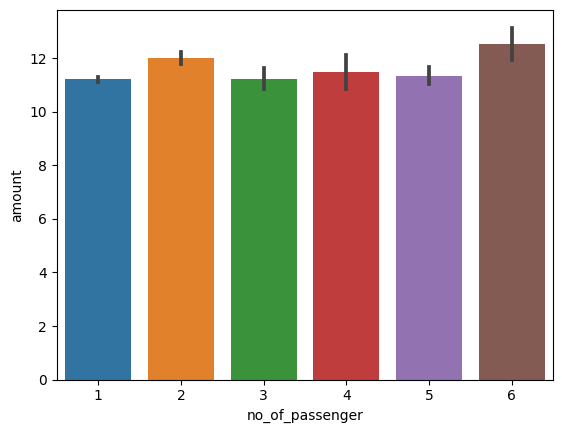

In [255]:
sns.barplot(x = 'no_of_passenger', y = 'amount', data = df)

Even though count of single passenger is much large (as shown above), but still the total fare amount is more when number of passengers are more.




---



#Correlation
-gives  the measure of strength of relation between two attributes.

-correlation is high when value is close to 1

-correlation is high b/w miles and fitness, that is there is relation b/w miles and fitness

-correlation range[-1,1], |correlation|<=1

-Positive correlation means both the attributes

-correlation value close to 0=> NO relationship

-correlation close to 0.5 => Moderate relation

In [256]:
corr=df.corr()
corr

<ipython-input-256-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,amount,no_of_passenger,dis_miles,year,day,hour
amount,1.000000,0.015718,0.017526,0.120969,-0.001514,-0.022106
no_of_passenger,0.015718,1.000000,-0.003093,0.005636,0.006781,0.011687
dis_miles,0.017526,-0.003093,1.000000,0.023190,0.011338,0.000430
year,0.120969,0.005636,0.023190,1.000000,-0.011084,0.004030
day,-0.001514,0.006781,0.011338,-0.011084,1.000000,-0.008199
hour,-0.022106,0.011687,0.000430,0.004030,-0.008199,1.000000


Correlation is highest between year and amount as comapred to other attributes.

<Axes: >

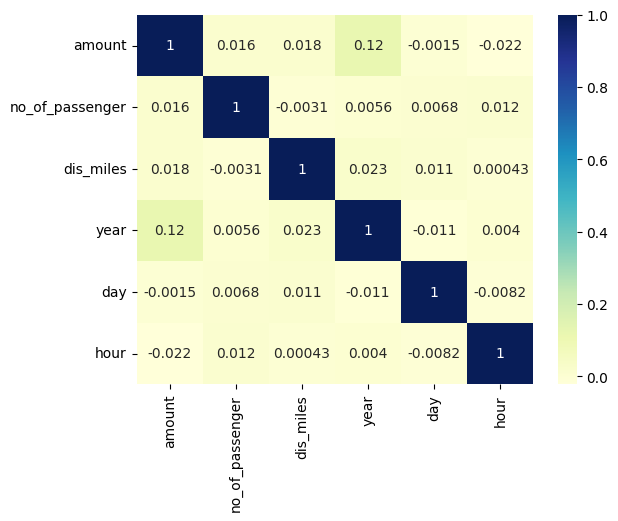

In [257]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")  

#Visual Representation of Correlation

- Missing values

Missing data can result in bias, although this need not always be the case, depending on the missing data mechanism and the applied statistical approach.

In [258]:
#check for missing values

df.isnull().sum()

amount             0
no_of_passenger    0
dis_miles          0
year               0
month              0
day                0
day_of_week        0
hour               0
dtype: int64

-There are no missing values in the dataset.

- Duplicates

Datasets that contain duplicates may contaminate the training data with the test data or vice versa.

So, we will remove the duplicates

In [259]:
##Check for duplicates
df.duplicated().sum()

0

-There are no duplicates in the dataset.

- Outliers

Outliers are data points in a data ser that is distance from all other observations, that is it lie outside the overall distribution

Occurrence of Outlier in the input data causes a machine learning model to provide false results. So, to prevent this we will drop outliers.

<Axes: >

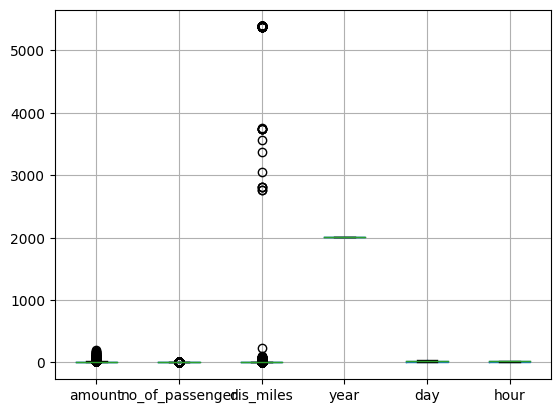

In [260]:
df.boxplot()

Outliers are present in amount, no_of_passenger, and dis_miles columns.

In [261]:
#Function To Removr Outliers

def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=  Q3+1.5*IQR
  return lower_range, upper_range

<Axes: >

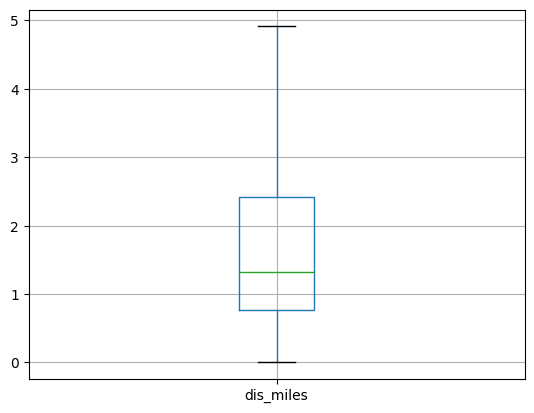

In [262]:
#Removing Outliers from 'dis_miles' column

low_dist,high_dist=remove_outlier(df["dis_miles"])
df["dis_miles"]=np.where(df["dis_miles"]<low_dist,low_dist,df["dis_miles"])
df["dis_miles"]=np.where(df["dis_miles"]>high_dist,high_dist,df["dis_miles"])

df.boxplot(["dis_miles"])

<Axes: >

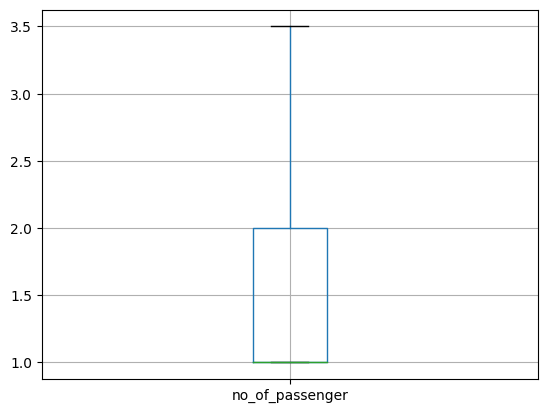

In [263]:
#Removing Outliers from 'no_of_passenger' column


low_pass,high_pass=remove_outlier(df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]<low_pass,low_pass,df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]>high_pass,high_pass,df["no_of_passenger"])

df.boxplot(["no_of_passenger"])

<Axes: >

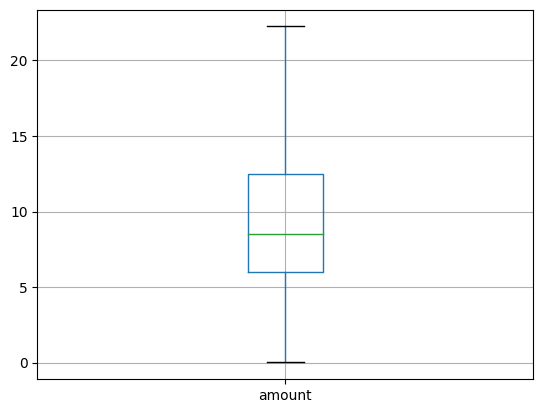

In [264]:
#Removing Outliers from 'amount' column


low_amt,high_amt=remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]<low_amt,low_amt,df["amount"])
df["amount"]=np.where(df["amount"]>high_amt,high_amt,df["amount"])

df.boxplot(["amount"])

- Encoding

It is used to represent categorical variables as numerical values, specifically for ordinal variables where the categories have an inherent order. The encoding works by creating a binary representation of each category and concatenating the binary values to form a new numerical variable.

In [265]:
df.dtypes

amount             float64
no_of_passenger    float64
dis_miles          float64
year                 int64
month               object
day                  int64
day_of_week         object
hour                 int64
dtype: object

In [266]:
# One hot encoding
df=pd.get_dummies(df,columns=['day_of_week','month'])
df.dtypes

amount             float64
no_of_passenger    float64
dis_miles          float64
year                 int64
day                  int64
hour                 int64
day_of_week_Fri      uint8
day_of_week_Mon      uint8
day_of_week_Sat      uint8
day_of_week_Sun      uint8
day_of_week_Thu      uint8
day_of_week_Tue      uint8
day_of_week_Wed      uint8
month_Apr            uint8
month_Aug            uint8
month_Dec            uint8
month_Feb            uint8
month_Jan            uint8
month_Jul            uint8
month_Jun            uint8
month_Mar            uint8
month_May            uint8
month_Nov            uint8
month_Oct            uint8
month_Sep            uint8
dtype: object

 One hot encoding is a technique that we use to represent categorical variables as numerical values.

 Thus, we have all numerical type column and modelling can be done.



---
# Regression Models

A regression model provides a function that describes the relationship between one or more independent variables and a response or dependent variable. 


-Spliting the data into test and train.

In [267]:
X=df.drop(["amount"],axis=1)  #except the amount column all others columns are Independent variables

y=df[["amount"]]  ##Dependent Variable Y=amount

#Spliting the data into ratio tran:test = 70:30
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

print('Size of train datset: \n',x_train.shape,'\n', y_train.shape)
print('Size of train datset: \n',x_test.shape,'\n', y_test.shape)

Size of train datset: 
 (34878, 24) 
 (34878, 1)
Size of train datset: 
 (14948, 24) 
 (14948, 1)


1. Linear Regression

Linear regression is a type of machine-learning algorithm more specifically a supervised machine-learning algorithm that learns from the labeled datasets and maps the data points to the most optimized linear functions.

In [268]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [269]:
print("Training Dataset Score: ",model_1.score(x_train,y_train))

Training Dataset Score:  0.7304296703353002


In [270]:
print("Test Dataset Score: ",model_1.score(x_test,y_test))

Test Dataset Score:  0.7303043603056986


- Standardisation of the data: 

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

It is used when we want to ensure zero mean and unit standard deviation.

In [271]:
from scipy.stats import zscore

-Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score.

In [272]:
xscaled_1=X.apply(zscore)
xscaled_1.describe()

,no_of_passenger,dis_miles,year,day,hour,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
count,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,...,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04,4.982600e+04
mean,1.273461e-16,4.235363e-17,-3.217179e-14,3.066003e-18,-8.727414e-17,-3.992935e-18,2.053509e-17,-9.126708e-18,-4.278144e-18,-4.584745e-17,...,4.777261e-17,5.454634e-17,-3.058873e-17,1.176490e-17,-5.105252e-17,-2.509845e-17,4.449270e-17,6.303133e-17,-8.691763e-17,2.395761e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-5.892023e-01,-1.281025e+00,-1.469109e+00,-1.694048e+00,-2.072337e+00,-4.254301e-01,-3.914326e-01,-4.244756e-01,-3.872283e-01,-4.169748e-01,...,-2.954834e-01,-3.066251e-01,-3.160497e-01,-2.809007e-01,-3.152809e-01,-3.206380e-01,-3.188077e-01,-2.853668e-01,-2.969664e-01,-2.874589e-01
25%,-5.892023e-01,-7.348376e-01,-9.329645e-01,-8.858147e-01,-6.895250e-01,-4.254301e-01,-3.914326e-01,-4.244756e-01,-3.872283e-01,-4.169748e-01,...,-2.954834e-01,-3.066251e-01,-3.160497e-01,-2.809007e-01,-3.152809e-01,-3.206380e-01,-3.188077e-01,-2.853668e-01,-2.969664e-01,-2.874589e-01
50%,-5.892023e-01,-3.341081e-01,1.393249e-01,3.788096e-02,7.870391e-02,-4.254301e-01,-3.914326e-01,-4.244756e-01,-3.872283e-01,-4.169748e-01,...,-2.954834e-01,-3.066251e-01,-3.160497e-01,-2.809007e-01,-3.152809e-01,-3.206380e-01,-3.188077e-01,-2.853668e-01,-2.969664e-01,-2.874589e-01
75%,5.668588e-01,4.592327e-01,6.754696e-01,8.461147e-01,8.469328e-01,-4.254301e-01,-3.914326e-01,-4.244756e-01,-3.872283e-01,-4.169748e-01,...,-2.954834e-01,-3.066251e-01,-3.160497e-01,-2.809007e-01,-3.152809e-01,-3.206380e-01,-3.188077e-01,-2.853668e-01,-2.969664e-01,-2.874589e-01
max,2.300950e+00,2.250338e+00,1.747759e+00,1.769810e+00,1.461516e+00,2.350562e+00,2.554718e+00,2.355848e+00,2.582456e+00,2.398227e+00,...,3.384285e+00,3.261311e+00,3.164059e+00,3.559977e+00,3.171775e+00,3.118782e+00,3.136687e+00,3.504262e+00,3.367384e+00,3.478759e+00


In [273]:
x_trainS,x_testS,y_train,y_test= train_test_split(xscaled_1,y,test_size=0.30,random_state=1)



---



- Standardised Linear Regression

In [274]:
model_1s=LinearRegression()
model_1s.fit(x_trainS,y_train)

LinearRegression()

In [275]:
print("Training Dataset Score: ",model_1s.score(x_trainS,y_train))

Training Dataset Score:  0.7303803765485524


In [369]:
print("Testing Dataset Score: ",model_1s.score(x_trainS,y_train))

Testining Dataset Score:  0.7303803765485524


2. KNN (KNearest Neighbor) Regression

KNN regression, intuitively, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

In [336]:
model_2=KNeighborsRegressor(n_neighbors=30,weights='uniform',p=2)           # The values assigned to parameter inside the paranthesis reduces OVERFITTING by the model and to get possible score
model_2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [337]:
print("Training Dataset Score: ",model_2.score(x_train,y_train))

Training Dataset Score:  0.7264859542485694


In [338]:
print("Test Dataset Score: ",model_2.score(x_test,y_test))

Test Dataset Score:  0.7082368812307338


- KNN Regression with Standardisation

In [412]:
model_2s=KNeighborsRegressor(n_neighbors=16,weights='uniform')
model_2s.fit(x_trainS,y_train)

KNeighborsRegressor(n_neighbors=16)

In [413]:
print("Training Dataset Score: ",model_2s.score(x_trainS,y_train))

Training Dataset Score:  0.7158246496920548


In [414]:
print("Test Dataset Score: ",model_2s.score(x_testS,y_test))

Test Dataset Score:  0.6756536377043622


3. SVR (Support Vector Regression)

The SVR algorithm aims to find the hyperplane that passes through as many data points as possible within a certain distance, called the margin. This approach helps to reduce the prediction error and allows SVR to handle non-linear relationships between input variables and the target variable using a kernel function.

In [283]:
model_3=SVR(kernel='poly',degree=75,epsilon=2.0,gamma='scale')                      
model_3.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=75, epsilon=2.0, kernel='poly')

In [284]:
print("Training Dataset Score: ",model_3.score(x_train,y_train))

Training Dataset Score:  0.7245922119092452


In [285]:
print("Test Dataset Score: ",model_3.score(x_test,y_test))

Test Dataset Score:  0.7244468727856065


- SVR with Standardisation

In [430]:
model_3s=SVR(kernel='poly',degree=9,epsilon=1.5)

#Standardisation:
xscaled_1=X.apply(zscore)
xscaled_1.describe()
x_trainS,x_testS,y_train,y_test= train_test_split(xscaled_1,y,test_size=0.30,random_state=1)


model_3s.fit(x_trainS,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=9, epsilon=1.5, kernel='poly')

In [431]:
print("Training Dataset Score: ",model_3s.score(x_trainS,y_train))

Training Dataset Score:  0.7533940350356011


In [432]:
print("Test Dataset Score: ",model_3s.score(x_testS,y_test))

Test Dataset Score:  0.7212708732997573


4. DT (Decision Tree) Regression:

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [289]:
model_4=DecisionTreeRegressor(max_depth=9,max_features="auto",min_samples_split=3,min_samples_leaf=1,random_state=1)
model_4.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_split=3,
                      random_state=1)

In [290]:
print("Training Dataset Score: ",model_4.score(x_train,y_train))

Training Dataset Score:  0.8050887132606417


In [291]:
print("Test Dataset Score: ",model_4.score(x_test,y_test))

Test Dataset Score:  0.7720835131885401


5. Bagging

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [292]:
model_5=BaggingRegressor(n_estimators=1000,base_estimator=model_4)
model_5.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9,
                                                      max_features='auto',
                                                      min_samples_split=3,
                                                      random_state=1),
                 n_estimators=1000)

In [293]:
print("Training Dataset Score: ",model_5.score(x_train,y_train))

Training Dataset Score:  0.8198684950895619


In [294]:
print("Test Dataset Score: ",model_5.score(x_test,y_test))

Test Dataset Score:  0.7880769060621252


6. Boosting

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [295]:
model_6=AdaBoostRegressor(n_estimators=50,learning_rate=3,random_state=1)
model_6.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=3, random_state=1)

In [296]:
print("Training Dataset Score: ",model_6.score(x_train,y_train))

Training Dataset Score:  0.7263156633773298


In [297]:
print("Test Dataset Score: ",model_6.score(x_test,y_test))

Test Dataset Score:  0.7269897351740062


7. Gradient Boost Regression

Gradient Boosting algorithm combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met

In [451]:
model_7=GradientBoostingRegressor(max_depth=6,n_estimators=100)
model_7.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=6)

In [452]:
print("Training Dataset Score: ",model_7.score(x_train,y_train))

Training Dataset Score:  0.8301850313895027


In [453]:
print("Test Dataset Score: ",model_7.score(x_test,y_test))

Test Dataset Score:  0.7919644423860606


8. Random Forest 

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.



In [454]:
model_8=RandomForestRegressor(max_depth=9,n_estimators=150)
model_8.fit(x_train,y_train)

<ipython-input-454-5ca6cfebfb22>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_8.fit(x_train,y_train)


RandomForestRegressor(max_depth=9, n_estimators=150)

In [455]:
print("Training Dataset Score: ",model_8.score(x_train,y_train))

Training Dataset Score:  0.8199278533311586


In [456]:
print("Test Dataset Score: ",model_8.score(x_test,y_test))

Test Dataset Score:  0.7874547985538806


Summary of all the model Score:

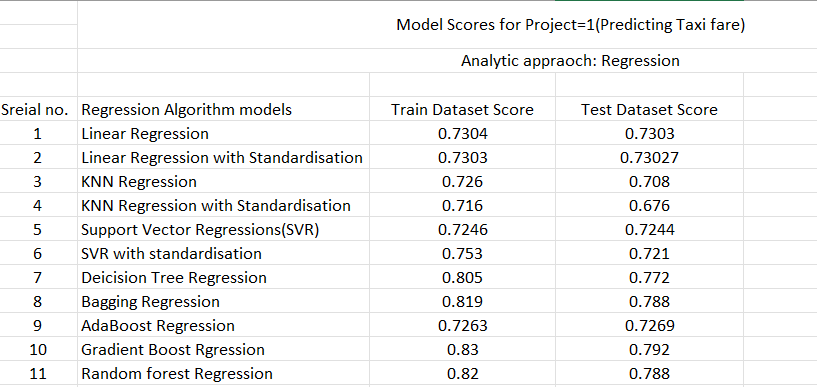

In [434]:
from sklearn.metrics import mean_squared_error

1. Mean square error [MSE] for model_1 (Linear Regression)

In [436]:
pred_1=model_1.predict(x_test)
mean_squared_error(y_test,pred_1)

8.205485646263785

2. MSE for model_1s (Linear Regression with standardisation)

In [437]:
pred_1s=model_1s.predict(x_test)
mean_squared_error(y_test,pred_1s)

4.312415426886013e+26

3. MSE for model_2 (KNN Regression)

In [438]:
pred_2=model_2.predict(x_test)
mean_squared_error(y_test,pred_2)

8.876888354161093

4. MSE for model_2s (KNN with Standardisation)

In [439]:
pred_2s=model_2s.predict(x_test)
mean_squared_error(y_test,pred_2s)

29.11112619272854

5. MSE for model_3 (SVR)

In [441]:
pred_3=model_3.predict(x_test)
mean_squared_error(y_test,pred_3)

8.383699613029302

6. MSE for model_3s (SVR with standardisation)

In [442]:
pred_3s=model_3s.predict(x_test)
mean_squared_error(y_test,pred_3s)

1.6818036162632488e+41

7. MSE of model_4(DT Regression)

In [443]:
pred_4=model_4.predict(x_test)
mean_squared_error(y_test,pred_4)

6.934355569107928

8. MSE for model_5 (Bagging Regression)

In [458]:
pred_5=model_5.predict(x_test)
mean_squared_error(y_test,pred_5)

6.447756839488075

9. MSE with model_6 (AdaBoost Regression)

In [459]:
pred_6=model_6.predict(x_test)
mean_squared_error(y_test,pred_6)

6.337418987040595

10. MSE with model_7 (Gradient Boost Regression) 

In [460]:
pred_7=model_7.predict(x_test)
mean_squared_error(y_test,pred_7)

6.329478607249919

11. MSE with model_8 (Random Forest Regression)

In [461]:
pred_8=model_8.predict(x_test)
mean_squared_error(y_test,pred_8)

6.4666844507580254

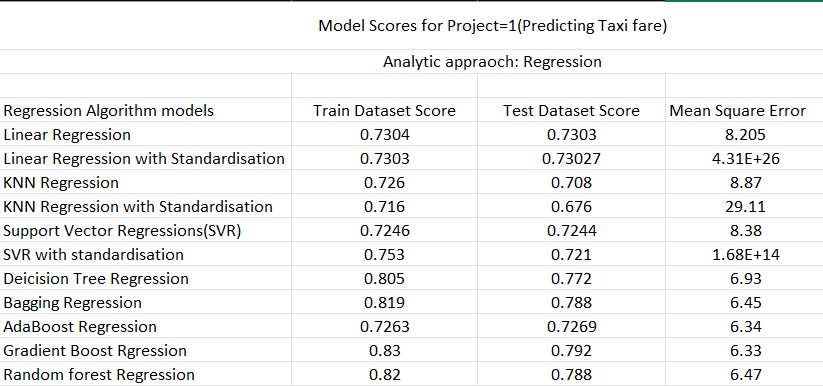

# Regression Model with minimum MSE(Mean Square Error) gives the best Regression Model for the dataset, so here the Best model is **Gradient Boost Regression** which has MSE =6.33 (minimum among all other models used).